In [3]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [4]:
%matplotlib inline

In [5]:
#read the data set
data = pd.read_csv('diabetes.csv')

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
sum(data.isnull().sum())

0

In [9]:
#Finding null values in the dataset
print((data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [10]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NAN)

In [11]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
#Replace the null values by its mean value in the column
data.fillna(data.mean(), inplace = True)

In [13]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [15]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataTranform = data.copy()
for dt in data.columns:
    dataTranform[dt] = label_encoder.fit_transform(data[dt])

In [16]:
dataTranform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,76,15,28,92,120,18,26,1
1,0,21,28,24,77,166,102,2,0
2,0,83,22,22,92,212,343,10,1
3,0,73,19,35,134,199,203,3,1
4,1,77,15,34,172,188,298,0,0
...,...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12,0
1996,8,117,21,35,82,113,380,15,1
1997,6,22,26,22,92,101,214,21,0
1998,0,67,44,39,82,245,170,5,1


In [17]:
X = dataTranform.drop(['Outcome'], axis = 1)

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,76,15,28,92,120,18,26
1,0,21,28,24,77,166,102,2
2,0,83,22,22,92,212,343,10
3,0,73,19,35,134,199,203,3
4,1,77,15,34,172,188,298,0
...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12
1996,8,117,21,35,82,113,380,15
1997,6,22,26,22,92,101,214,21
1998,0,67,44,39,82,245,170,5


In [19]:
Y = dataTranform['Outcome']

In [20]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [21]:
diabetes_feature = list(X.columns)

In [22]:
diabetes_feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [25]:
Y_test

1860    1
353     0
1333    1
905     1
1289    1
       ..
965     0
1284    0
1739    0
261     1
535     1
Name: Outcome, Length: 400, dtype: int64

In [26]:
X_train.shape

(1600, 8)

In [27]:
Y_train.shape

(1600,)

In [28]:
X_test.shape

(400, 8)

In [29]:
Y_test.shape

(400,)

In [30]:
#Visualizing

In [31]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


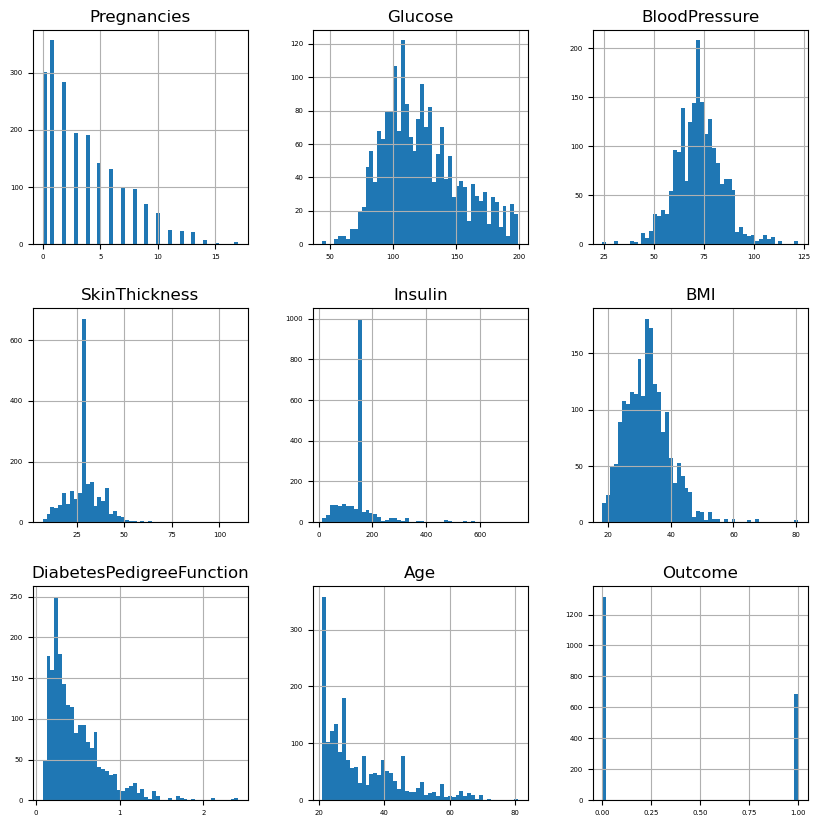

In [32]:
#Histgrams
data.hist(figsize=(10, 10), bins=50, xlabelsize=5, ylabelsize=5);

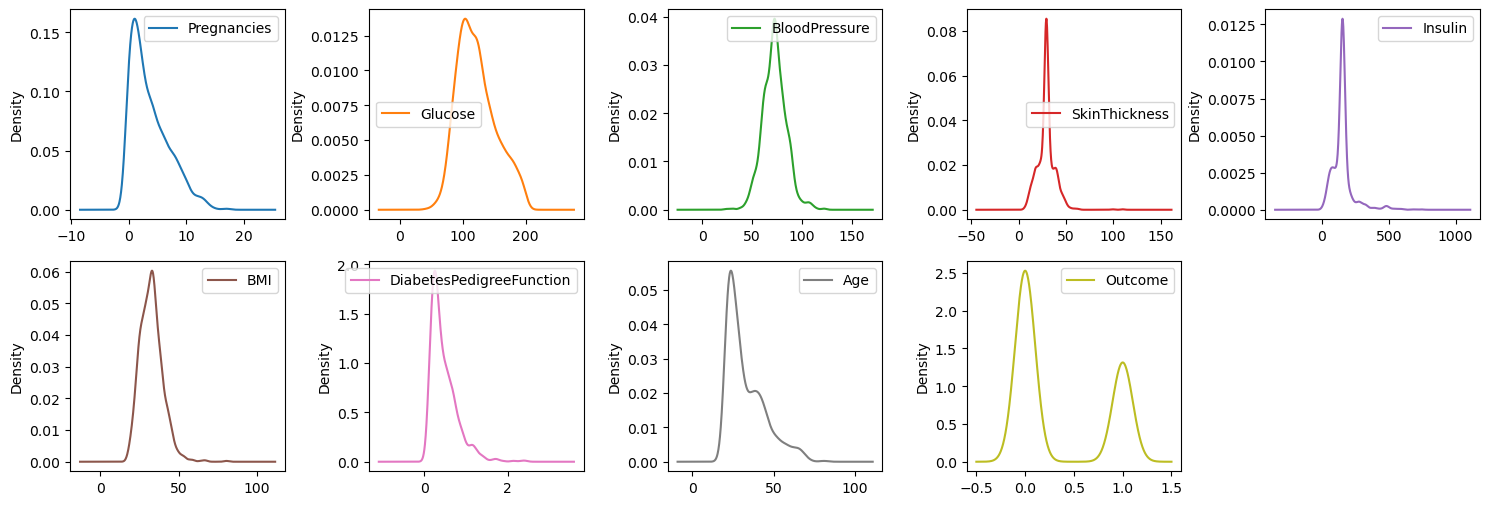

In [33]:
# Density graphs
data.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.tight_layout() 

In [34]:
# Omit the 'outcome' column from the dataset
temp_data = data.drop('Outcome', axis = 1)

In [35]:
# Calculate the mean of each column
means = temp_data.mean()

In [36]:
means

Pregnancies                   3.703500
Glucose                     121.975340
BloodPressure                72.403665
SkinThickness                29.341275
Insulin                     153.743295
BMI                          32.650101
DiabetesPedigreeFunction      0.470930
Age                          33.090500
dtype: float64

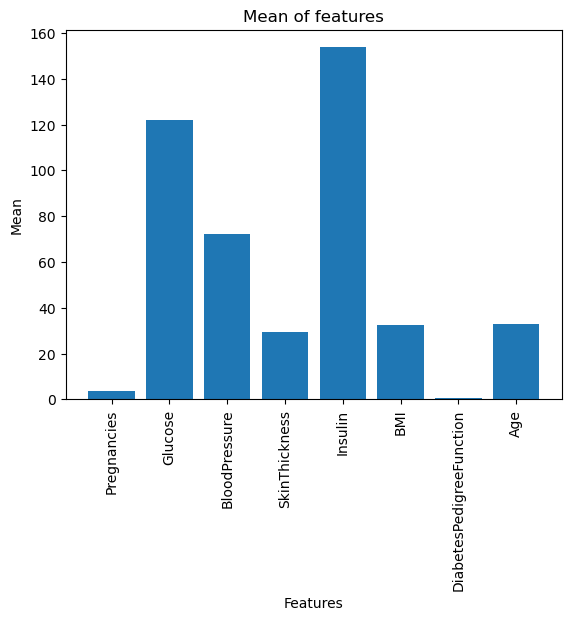

In [37]:
# Create a bar chart
plt.bar(means.index, means.values)

# Set the x-axis labels to be displayed vertically
plt.xticks(rotation='vertical')

# Add labels to the chart
plt.xlabel('Features')
plt.ylabel('Mean')
plt.title('Mean of features')

# Display the chart
plt.show()

In [38]:
#Using algorithms
#Logistic Regression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from scipy import stats

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear")
lr_model = lr.fit(X_train,Y_train)
lr_model

LogisticRegression(solver='liblinear')

In [40]:
Y_prediction = lr_model.predict(X_test)

In [41]:
confusion_matrix(Y_test, Y_prediction)
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       253
           1       0.75      0.52      0.62       147

    accuracy                           0.76       400
   macro avg       0.76      0.71      0.72       400
weighted avg       0.76      0.76      0.75       400



In [42]:
accuracy_score(Y_test, lr_model.predict(X_test))
cross_val_score(lr_model, X_test, Y_test, cv = 10).mean()

0.775

In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)
knn_model

KNeighborsClassifier()

In [44]:
Y_prediction = knn_model.predict(X_test)
accuracy_score(Y_test, Y_prediction)

C:\Users\Madhawa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.81

In [50]:
#SVM
from sklearn.svm import SVC

svm_model = SVC(kernel = "linear").fit(X_train, Y_train)

Y_prediction = svm_model.predict(X_test)
accuracy_score(Y_test, Y_prediction)

0.76

In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, Y_train)

Y_prediction = rf_model.predict(X_test)
accuracy_score(Y_test, Y_prediction)

0.985

----------------------------
LogisticRegression:
Accuracy: 76.2500%
----------------------------
KNeighborsClassifier:
Accuracy: 81.0000%
----------------------------
SVC:
Accuracy: 76.0000%
----------------------------
RandomForestClassifier:
Accuracy: 98.5000%


C:\Users\Madhawa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


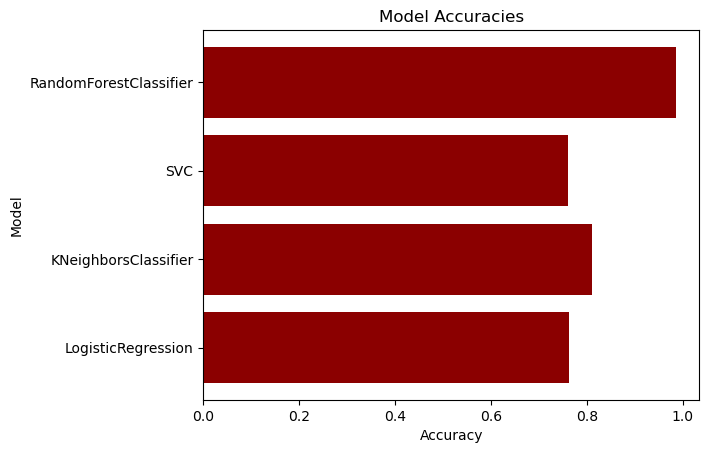

In [48]:
models = [
    lr_model,
    knn_model,
    svm_model,
    rf_model,
]

model_names = []
accuracies = []

for model in models:
    name = model.__class__.__name__
    Y_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_prediction)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    model_names.append(name)
    accuracies.append(accuracy)
    
# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(model_names, accuracies, color = 'darkred')

# Set the title and labels
ax.set_title('Model Accuracies')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Display the chart
plt.show()